# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

# 1. Data Preparation

## 1.1 Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 1.2 Standardizing the data

In [4]:
X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

X = StandardScaler().fit_transform(X)
X.shape

(2085, 30)

In [5]:
print("mean",np.mean(X))
print("standard deviation",np.std(X))

mean 1.4795873914109202e-16
standard deviation 1.0


Let's convert the normalized features into a tabular format with the help of DataFrame.

In [6]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_data = pd.DataFrame(X,columns=feat_cols)
normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
2080,-0.380703,1.038071,0.486163,-1.348923,-0.747352,-0.584976,-0.612977,-0.198672,0.649800,0.153891,...,0.256802,-0.850106,-0.572372,-0.590260,2.140108,1.685160,0.818347,-0.680515,1.158925,-1.279370
2081,1.404586,0.314038,-0.392502,-1.040448,-0.747352,-1.315351,-0.612977,-0.565320,-0.011036,1.038470,...,-0.928821,-0.850106,-0.572372,-0.590260,-0.605098,-0.710355,-0.422490,-0.680515,-1.040177,-1.324959
2082,-1.101261,1.009549,1.661943,1.465690,-0.024988,0.720527,0.671552,-0.376904,0.422240,0.149897,...,-0.928821,2.101359,2.780799,-0.590260,-0.605098,-0.710355,-0.598430,-0.680515,0.812463,1.094750
2083,-1.323362,-0.980446,-0.762085,0.496696,-0.747352,0.212439,-0.612977,1.230574,1.498145,-1.084121,...,-0.928821,1.042992,-0.572372,2.282886,-0.605098,-0.401584,-0.598430,0.631450,1.712850,0.730040
2084,-0.682489,-0.844415,-1.247615,-0.594293,-0.747352,-0.974862,-0.612977,-1.366512,-1.112428,0.105968,...,-0.928821,-0.647274,-0.572372,0.372220,-0.605098,-0.710355,-0.598430,1.545075,-1.009058,-1.324959


Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional data to two-dimensional principal components.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.


In [7]:
pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(X)

print(X.shape)
print(principalComponents_data.shape)

(2085, 30)
(2085, 2)


Next, let's create a DataFrame that will have the principal component values for all 2085 samples.

In [8]:
principal_data_Df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2'])
principal_data_Df.tail()

,principal component 1,principal component 2
2080,-0.288845,0.355967
2081,-3.582806,1.830660
2082,0.947279,2.615194
2083,0.449841,-4.333866
2084,-2.912318,-1.096755


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [9]:
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variation per principal component: [0.14507121 0.13423252]


From the above output, you can observe that the principal component 1 holds 14.5% of the information while the principal component 2 holds only 13.4% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 76.1% information was lost.

Let's plot the visualization of the samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

In [10]:
principal_data = pd.concat([principal_data_Df, data["WeakLinks"]], axis = 1)
principal_data

,principal component 1,principal component 2,WeakLinks
0,0.455591,0.923807,RightShoulderElevation
1,0.340166,-3.006334,RightArmFallForward
2,-1.264384,-0.826703,LeftArmFallForward
3,1.870635,2.444825,RightShoulderElevation
4,-2.190335,2.022005,ForwardHead
...,...,...,...
2080,-0.288845,0.355967,RightArmFallForward
2081,-3.582806,1.830660,LeftArmFallForward
2082,0.947279,2.615194,LeftArmFallForward
2083,0.449841,-4.333866,RightKneeMovesOutward


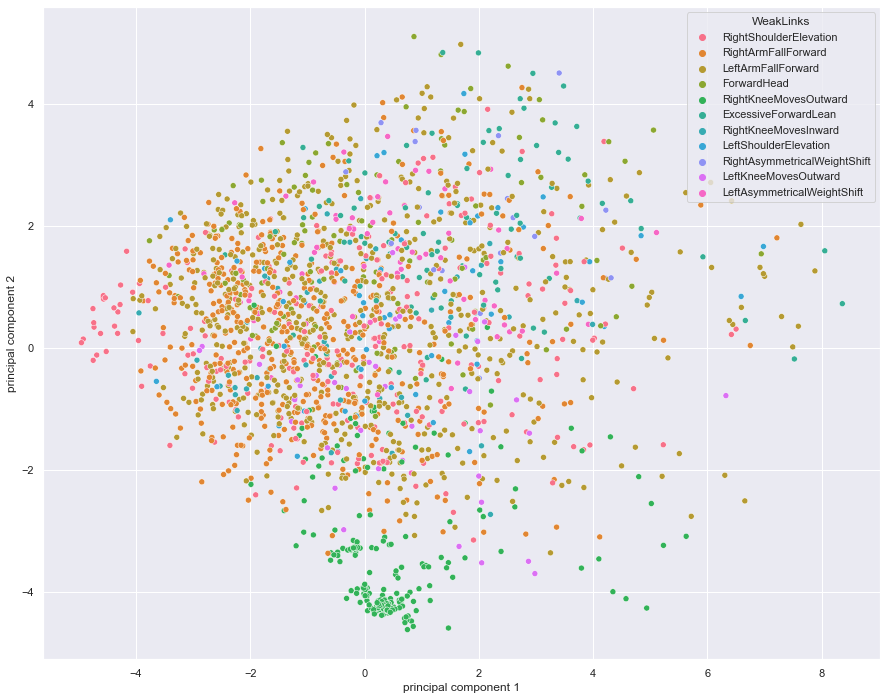

In [11]:
fig = plt.figure(figsize = (15,12))
sns.scatterplot(data=principal_data, x="principal component 1", y="principal component 2", hue="WeakLinks")
plt.show()